In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Load the IMDb dataset from Keras
max_features = 10000  # Number of words to consider as features (vocabulary size)
max_len = 200  # Maximum number of words in each review (sequence length)

# Loading data and splitting it into training and testing
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Padding sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [2]:
from tensorflow.keras import models, layers

# Define the model
model = models.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=128, input_length=max_len),  # Embedding layer
    layers.Bidirectional(layers.LSTM(64)),  # Bidirectional LSTM to capture forward and backward dependencies
    layers.Dense(64, activation='relu'),  # Dense hidden layer
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/Users/alkasingh/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 88s 222ms/step - accuracy: 0.7045 - loss: 0.5305 - val_accuracy: 0.8695 - val_loss: 0.3033
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 91s 233ms/step - accuracy: 0.9004 - loss: 0.2559 - val_accuracy: 0.8669 - val_loss: 0.3259
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 92s 234ms/step - accuracy: 0.9372 - loss: 0.1734 - val_accuracy: 0.8714 - val_loss: 0.3864
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 93s 237ms/step - accuracy: 0.9575 - loss: 0.1238 - val_accuracy: 0.8677 - val_loss: 0.3772
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 94s 241ms/step - accuracy: 0.9751 - loss: 0.0745 - val_accuracy: 0.8649 - val_loss: 0.5101


In [4]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.8638 - loss: 0.5185
Test Accuracy: 0.8649


In [5]:
# Sample new reviews for prediction
new_reviews = ["The movie was fantastic! I loved it.",
               "It was a terrible movie, I hated it."]

# Preprocess new reviews (tokenize and pad)""
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(new_reviews)
sequences = tokenizer.texts_to_sequences(new_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Predict sentiment
predictions = model.predict(padded_sequences)
for i, pred in enumerate(predictions):
    sentiment = 'Positive' if pred > 0.5 else 'Negative'
    print(f"Review: '{new_reviews[i]}' -> Sentiment: {sentiment}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Review: 'The movie was fantastic! I loved it.' -> Sentiment: Negative
Review: 'It was a terrible movie, I hated it.' -> Sentiment: Negative


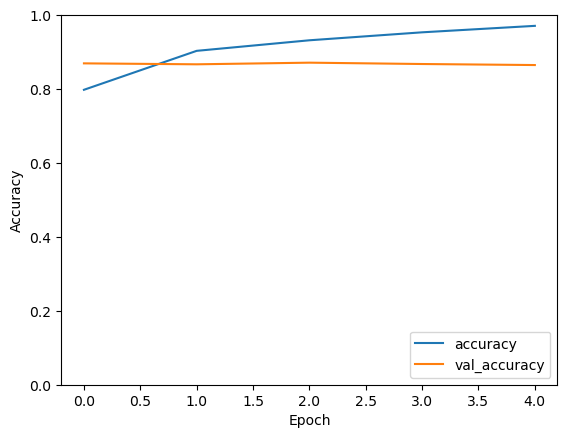

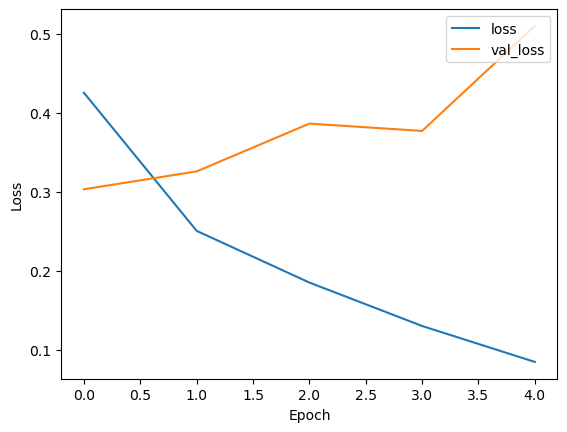

In [6]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


## Key Points to Mention in an Interview:<br>
1.Data Preprocessing: Explain how the IMDb dataset was tokenized and padded to ensure that all reviews have the same length, enabling efficient batch processing.<br>

2.Word Embeddings: Discuss the use of an embedding layer to map words to dense vectors, capturing the semantic <br>
meaning of words.<br>

3.Bidirectional LSTM: Highlight the use of a Bidirectional LSTM, which helps the model capture both forward and backward dependencies in the review text. Mention that LSTMs are particularly useful for handling sequential data like text.<br>

4.Dropout: Stress the importance of using dropout to prevent overfitting, which is common in deep learning models.<br>

5.Evaluation Metrics: Explain how accuracy and loss were used to evaluate model performance, and the importance of validation data in preventing overfitting.<br>

6.Practicality: Emphasize that this model can be extended to other datasets and tasks, such as spam detection, emotion classification, or chatbot responses.**<br>

## Summary
**This project demonstrates your ability to work with TensorFlow and Keras to build an NLP model for Sentiment Analysis. You covered data preprocessing, model building using advanced layers like Embeddings and Bidirectional LSTMs, training the model, and evaluating its performance. The key takeaways include your understanding of sequence modeling, embedding layers, and overfitting prevention techniques.**